In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import hdbscan
from sklearn.cluster import Birch
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.cluster import KMeans
from pyclustering.cluster.clarans import clarans
from sklearn_extra.cluster import KMedoids


In [1]:
file_path = 'D:\\study material\\4.2\\Data Analytics Lab\\Project\\KDDCup99.csv'
df = pd.read_csv(file_path)

print(df.info())
print(df.isnull().sum())

df = df.dropna()  

df = pd.get_dummies(df)
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [2]:
# Standardize 
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=0.95)  
pca_df = pca.fit_transform(scaled_df)


print("Shape after PCA:", pca_df.shape)


Shape after PCA: (494020, 94)


DBSCAN

In [5]:
# Sample a subset of the data if the dataset is too large
# For example, take a random sample of 10,000 instances
if pca_df.shape[0] > 49000:
    np.random.seed(42)
    sample_indices = np.random.choice(pca_df.shape[0], 40000, replace=False)
    pca_df_sampled = pca_df[sample_indices]
else:
    pca_df_sampled = pca_df

# Apply DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=10)  # Adjusted parameters
dbscan_labels = dbscan.fit_predict(pca_df_sampled)

# Evaluate DBSCAN
# Note: Need to check if there is more than one cluster to calculate the scores
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(pca_df_sampled, dbscan_labels)
    dbscan_db_score = davies_bouldin_score(pca_df_sampled, dbscan_labels)
    dbscan_ch_score = calinski_harabasz_score(pca_df_sampled, dbscan_labels)

    print("DBSCAN Silhouette Score:", dbscan_silhouette)
    print("DBSCAN Davies-Bouldin Score:", dbscan_db_score)
    print("DBSCAN Calinski-Harabasz Index:", dbscan_ch_score)
else:
    print("DBSCAN resulted in a single cluster. Scores cannot be calculated.")

DBSCAN Silhouette Score: 0.9011267669531863
DBSCAN Davies-Bouldin Score: 2.591504940760669
DBSCAN Calinski-Harabasz Index: 532.1230818632234


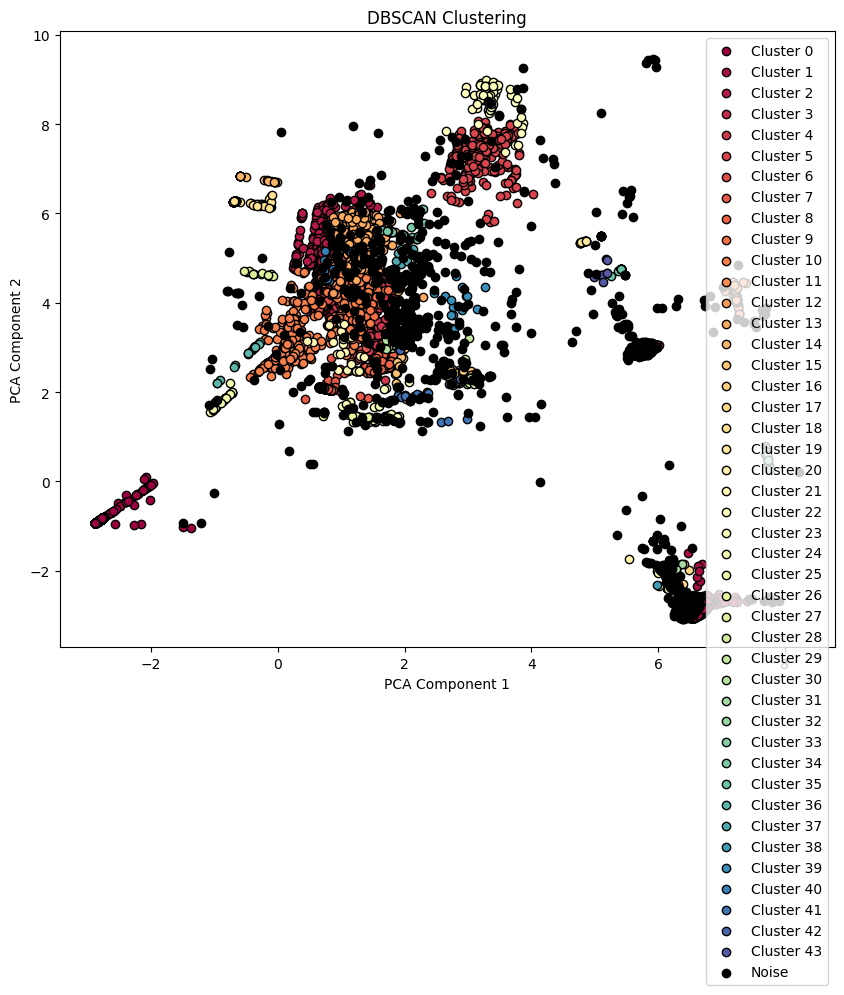

In [6]:
plt.figure(figsize=(10, 8))


unique_labels = set(dbscan_labels)


colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))


for k, col in zip(unique_labels, colors):
    if k == -1:
      
        col = 'k'

    class_member_mask = (dbscan_labels == k)

    xy = pca_df_sampled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], edgecolor='k', label=f'Cluster {k}' if k != -1 else 'Noise')

plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


Spectral Clustering

In [7]:
# Sample a subset of the data if the dataset is too large
if pca_df.shape[0] > 40000:
    np.random.seed(42)
    sample_indices = np.random.choice(pca_df.shape[0], 40000, replace=False)
    pca_df_sampled = pca_df[sample_indices]
else:
    pca_df_sampled = pca_df

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', n_jobs=-1)  # Using all processors
spectral_labels = spectral.fit_predict(pca_df_sampled)

# Evaluate Spectral Clustering
spectral_silhouette = silhouette_score(pca_df_sampled, spectral_labels)
spectral_db_score = davies_bouldin_score(pca_df_sampled, spectral_labels)
spectral_ch_score = calinski_harabasz_score(pca_df_sampled, spectral_labels)

print("Spectral Clustering Silhouette Score:", spectral_silhouette)
print("Spectral Clustering Davies-Bouldin Score:", spectral_db_score)
print("Spectral Clustering Calinski-Harabasz Index:", spectral_ch_score)

c:\Users\arafa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clustering Silhouette Score: -0.36164181472778795
Spectral Clustering Davies-Bouldin Score: 2.870482898356567
Spectral Clustering Calinski-Harabasz Index: 843.4105147516598


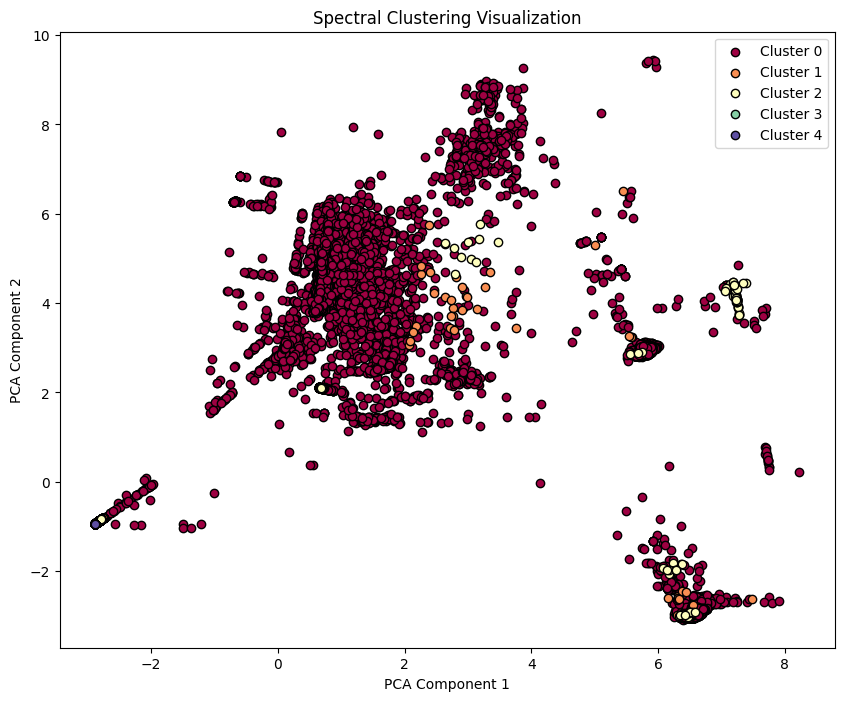

In [11]:
# Create a scatter plot to visualize the clusters
plt.figure(figsize=(10, 8))

# Unique labels in the clustering result
unique_labels = set(spectral_labels)

# Generate colors for each cluster
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot each cluster with a different color
for k, col in zip(unique_labels, colors):
    class_member_mask = (spectral_labels == k)

    xy = pca_df_sampled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], edgecolor='k', label=f'Cluster {k}')

plt.title('Spectral Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


HDBSCAN

In [9]:

if pca_df.shape[0] > 40000:
    np.random.seed(42)
    sample_indices = np.random.choice(pca_df.shape[0], 40000, replace=False)
    pca_df_sampled = pca_df[sample_indices]
else:
    pca_df_sampled = pca_df

# Apply HDBSCAN
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
hdbscan_labels = hdbscan_clusterer.fit_predict(pca_df_sampled)

# Evaluate HDBSCAN
if len(set(hdbscan_labels)) > 1:
    hdbscan_silhouette = silhouette_score(pca_df_sampled, hdbscan_labels)
    hdbscan_db_score = davies_bouldin_score(pca_df_sampled, hdbscan_labels)
    hdbscan_ch_score = calinski_harabasz_score(pca_df_sampled, hdbscan_labels)

    print("HDBSCAN Silhouette Score:", hdbscan_silhouette)
    print("HDBSCAN Davies-Bouldin Score:", hdbscan_db_score)
    print("HDBSCAN Calinski-Harabasz Index:", hdbscan_ch_score)
else:
    print("HDBSCAN resulted in a single cluster. Scores cannot be calculated.")


HDBSCAN Silhouette Score: 0.5564217075488375
HDBSCAN Davies-Bouldin Score: 1.7489070505855566
HDBSCAN Calinski-Harabasz Index: 117.40912612484549


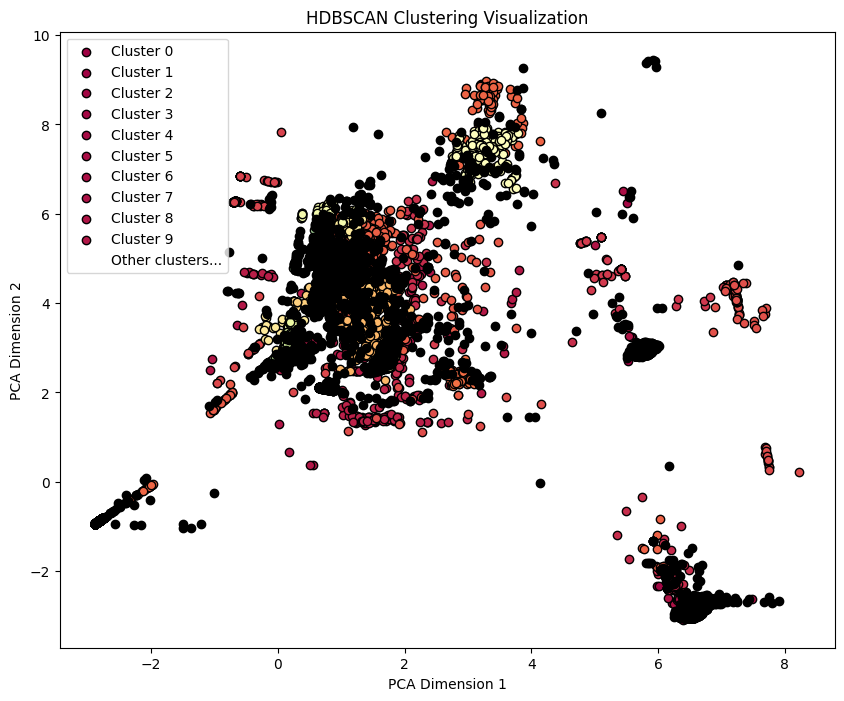

In [12]:
plt.figure(figsize=(10, 8))


unique_labels = set(hdbscan_labels)


colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Limit the number of clusters to show in the legend
max_legend_clusters = 10

# Plot each cluster with a different color
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (hdbscan_labels == k)

    xy = pca_df_sampled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], edgecolor='k', label=f'Cluster {k}' if k != -1 else 'Noise')

# Add title and labels
plt.title('HDBSCAN Clustering Visualization')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')

# Create a custom legend with a limited number of clusters
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

# Show only the first max_legend_clusters clusters in the legend
if len(by_label) > max_legend_clusters:
    legend_labels = list(by_label.keys())[:max_legend_clusters] + ['Other clusters...']
    legend_handles = list(by_label.values())[:max_legend_clusters] + [plt.Line2D([0], [0], linestyle="none")]
    plt.legend(legend_handles, legend_labels, loc='best')
else:
    plt.legend(by_label.values(), by_label.keys(), loc='best')

plt.show()


BIRCH

In [13]:
if pca_df.shape[0] > 40000:
    np.random.seed(42)
    sample_indices = np.random.choice(pca_df.shape[0], 40000, replace=False)
    pca_df_sampled = pca_df[sample_indices]
else:
    pca_df_sampled = pca_df

# Apply BIRCH
birch = Birch(n_clusters=5)
birch_labels = birch.fit_predict(pca_df_sampled)

# Evaluate BIRCH
if len(set(birch_labels)) > 1:
    birch_silhouette = silhouette_score(pca_df_sampled, birch_labels)
    birch_db_score = davies_bouldin_score(pca_df_sampled, birch_labels)
    birch_ch_score = calinski_harabasz_score(pca_df_sampled, birch_labels)

    print("BIRCH Silhouette Score:", birch_silhouette)
    print("BIRCH Davies-Bouldin Score:", birch_db_score)
    print("BIRCH Calinski-Harabasz Index:", birch_ch_score)
else:
    print("BIRCH resulted in a single cluster. Scores cannot be calculated.")

BIRCH Silhouette Score: 0.9685298661380326
BIRCH Davies-Bouldin Score: 0.06505223032750858
BIRCH Calinski-Harabasz Index: 2105.437069848996


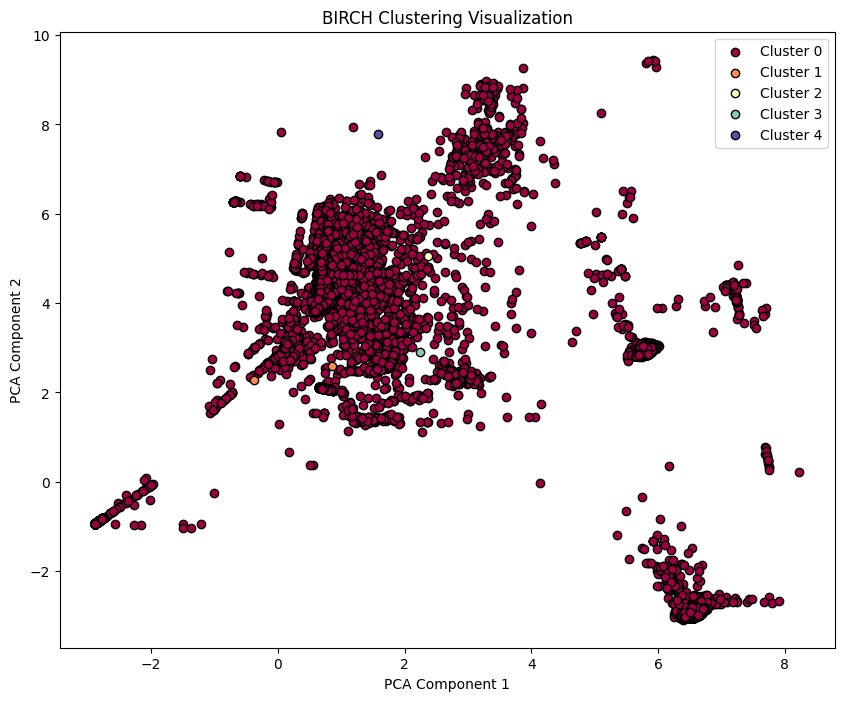

In [14]:
plt.figure(figsize=(10, 8))

# Unique labels in the clustering result
unique_labels = set(birch_labels)

# Generate colors for each cluster
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Limit the number of clusters to show in the legend
max_legend_clusters = 10

# Plot each cluster with a different color
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise (if any).
        col = 'k'

    class_member_mask = (birch_labels == k)

    xy = pca_df_sampled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], edgecolor='k', label=f'Cluster {k}' if k != -1 else 'Noise')

# Add title and labels
plt.title('BIRCH Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Create a custom legend with a limited number of clusters
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

# Show only the first max_legend_clusters clusters in the legend
if len(by_label) > max_legend_clusters:
    legend_labels = list(by_label.keys())[:max_legend_clusters] + ['Other clusters...']
    legend_handles = list(by_label.values())[:max_legend_clusters] + [plt.Line2D([0], [0], linestyle="none")]
    plt.legend(legend_handles, legend_labels, loc='best')
else:
    plt.legend(by_label.values(), by_label.keys(), loc='best')

plt.show()


Autoencoder + Kmeans

In [15]:
# Sample a subset of the data if the dataset is too large
if pca_df.shape[0] > 40000:
    np.random.seed(42)
    sample_indices = np.random.choice(pca_df.shape[0], 40000, replace=False)
    pca_df_sampled = pca_df[sample_indices]
else:
    pca_df_sampled = pca_df

# Define the autoencoder model
input_dim = pca_df_sampled.shape[1]
encoding_dim = 10

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(pca_df_sampled, pca_df_sampled, epochs=50, batch_size=256, shuffle=True, validation_split=0.2, verbose=0)

# Encode the data
encoder_model = Model(inputs=input_layer, outputs=encoder)
encoded_data = encoder_model.predict(pca_df_sampled)

# Apply KMeans on encoded data
kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(encoded_data)

# Evaluate Autoencoder + KMeans
if len(set(kmeans_labels)) > 1:
    ae_kmeans_silhouette = silhouette_score(pca_df_sampled, kmeans_labels)
    ae_kmeans_db_score = davies_bouldin_score(pca_df_sampled, kmeans_labels)
    ae_kmeans_ch_score = calinski_harabasz_score(pca_df_sampled, kmeans_labels)

    print("Autoencoder + KMeans Silhouette Score:", ae_kmeans_silhouette)
    print("Autoencoder + KMeans Davies-Bouldin Score:", ae_kmeans_db_score)
    print("Autoencoder + KMeans Calinski-Harabasz Index:", ae_kmeans_ch_score)
else:
    print("Autoencoder + KMeans resulted in a single cluster. Scores cannot be calculated.")

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step
Autoencoder + KMeans Silhouette Score: 0.6992258959239489
Autoencoder + KMeans Davies-Bouldin Score: 3.033502427756618
Autoencoder + KMeans Calinski-Harabasz Index: 2118.9984593876243


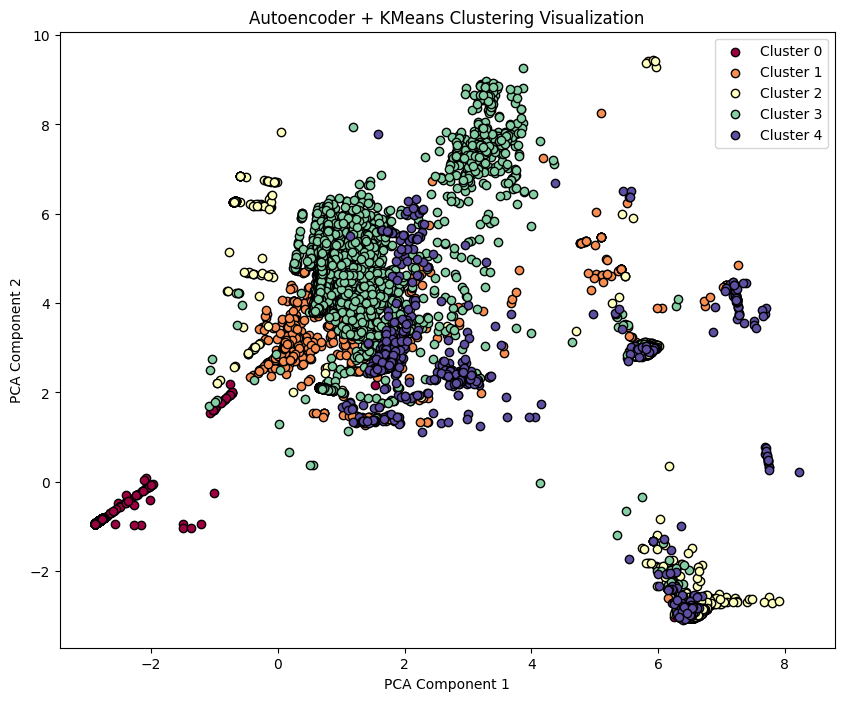

In [16]:
# Create a scatter plot to visualize the clusters
plt.figure(figsize=(10, 8))

# Unique labels in the clustering result
unique_labels = set(kmeans_labels)

# Generate colors for each cluster
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Limit the number of clusters to show in the legend
max_legend_clusters = 10

# Plot each cluster with a different color
for k, col in zip(unique_labels, colors):
    class_member_mask = (kmeans_labels == k)

    xy = pca_df_sampled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], edgecolor='k', label=f'Cluster {k}')

# Add title and labels
plt.title('Autoencoder + KMeans Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Create a custom legend with a limited number of clusters
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

# Show only the first max_legend_clusters clusters in the legend
if len(by_label) > max_legend_clusters:
    legend_labels = list(by_label.keys())[:max_legend_clusters] + ['Other clusters...']
    legend_handles = list(by_label.values())[:max_legend_clusters] + [plt.Line2D([0], [0], linestyle="none")]
    plt.legend(legend_handles, legend_labels, loc='best')
else:
    plt.legend(by_label.values(), by_label.keys(), loc='best')

plt.show()


CLARA

In [17]:
# Assuming pca_df is a numpy.ndarray
# Sample a subset of the data if the dataset is too large
if pca_df.shape[0] > 49000:
    np.random.seed(42)
    sample_indices = np.random.choice(pca_df.shape[0], 49000, replace=False)
    pca_df_sampled = pca_df[sample_indices]  # Use NumPy indexing for arrays
else:
    pca_df_sampled = pca_df

# Apply CLARANS
num_clusters = 5
num_local = 2  # Number of local minima obtained
max_neighbor = 3  # The number of neighbors to consider during search
clarans_instance = clarans(pca_df_sampled.tolist(), num_clusters, num_local, max_neighbor)
clarans_instance.process()
clarans_clusters = clarans_instance.get_clusters()

# Flatten the cluster list into a single array of labels
clarans_labels_flat = np.zeros(len(pca_df_sampled), dtype=int)
for cluster_num, cluster in enumerate(clarans_clusters):
    for index in cluster:
        clarans_labels_flat[index] = cluster_num

# Evaluate CLARANS
if len(set(clarans_labels_flat)) > 1:
    clarans_silhouette = silhouette_score(pca_df_sampled, clarans_labels_flat)
    clarans_db_score = davies_bouldin_score(pca_df_sampled, clarans_labels_flat)
    clarans_ch_score = calinski_harabasz_score(pca_df_sampled, clarans_labels_flat)

    print("CLARANS Silhouette Score:", clarans_silhouette)
    print("CLARANS Davies-Bouldin Score:", clarans_db_score)
    print("CLARANS Calinski-Harabasz Index:", clarans_ch_score)
else:
    print("CLARANS resulted in a single cluster. Scores cannot be calculated.")

CLARANS Silhouette Score: 0.6072610964607015
CLARANS Davies-Bouldin Score: 2.8983932275588784
CLARANS Calinski-Harabasz Index: 2660.818093844207


KMedoids

Optimal number of clusters: 2
KMedoids Scores: {'Silhouette': 0.9878502646885902, 'Davies-Bouldin': 0.00879718536940248, 'Calinski-Harabasz': 4014.794754732508}


C:\Users\arafa\AppData\Local\Temp\ipykernel_240\3403655834.py:72: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend(*zip(*legend_items), loc='best')


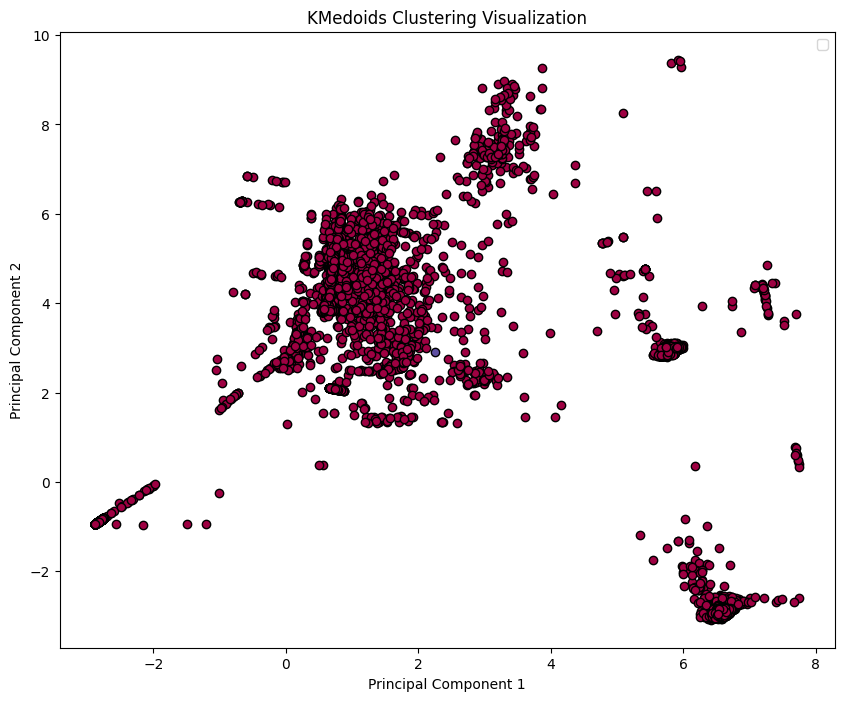

In [5]:
# Assuming 'pca_df' is a numpy array and already loaded
if pca_df.shape[0] > 20000:
    np.random.seed(42)
    sample_indices = np.random.choice(pca_df.shape[0], 20000, replace=False)
    pca_df_sampled = pca_df[sample_indices]
else:
    pca_df_sampled = pca_df

# Function to find the optimal number of clusters using silhouette score
def find_optimal_clusters(data, max_k, step=2):
    best_k = 2
    best_score = -1
    scores = []
    for k in range(2, max_k + 1, step):
        kmedoids = KMedoids(n_clusters=k, random_state=42, init='k-medoids++')
        labels = kmedoids.fit_predict(data)
        if len(set(labels)) == 1:  # Handling the case where only one cluster is formed
            continue
        score = silhouette_score(data, labels)
        scores.append(score)
        if score > best_score:
            best_k = k
            best_score = score
    return best_k, scores

optimal_k, all_scores = find_optimal_clusters(pca_df_sampled, 10)
print("Optimal number of clusters:", optimal_k)

# Attempt clustering with the optimal number of clusters
try:
    kmedoids = KMedoids(n_clusters=optimal_k, random_state=42, init='k-medoids++')
    kmedoids_labels = kmedoids.fit_predict(pca_df_sampled)
    
    # Ensure that no cluster is empty
    if len(set(kmedoids_labels)) == optimal_k:
        scores = {
            'Silhouette': silhouette_score(pca_df_sampled, kmedoids_labels),
            'Davies-Bouldin': davies_bouldin_score(pca_df_sampled, kmedoids_labels),
            'Calinski-Harabasz': calinski_harabasz_score(pca_df_sampled, kmedoids_labels)
        }
        print("KMedoids Scores:", scores)
    else:
        print("One or more clusters are empty. Adjust parameters or dataset.")
except Exception as e:
    print(f"Error during clustering: {str(e)}")

# Visualization code here, similar to previous examples.


# Visualization code
plt.figure(figsize=(10, 8))
unique_labels = set(kmedoids_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
max_legend_clusters = 10

for k, col in zip(unique_labels, colors):
    class_member_mask = (kmedoids_labels == k)
    xy = pca_df_sampled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], edgecolor='k', label=f'Cluster {k}')

plt.title('KMedoids Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend_items = list(by_label.items())[:max_legend_clusters] + (('Other clusters...', plt.Line2D([0], [0], linestyle="none")),) if len(by_label) > max_legend_clusters else by_label.items()
plt.legend(*zip(*legend_items), loc='best')
plt.show()


In [ ]:
# Create a scatter plot to visualize the clusters
plt.figure(figsize=(10, 8))

# Unique labels in the clustering result
unique_labels = set(kmedoids_labels)

# Generate colors for each cluster
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Limit the number of clusters to show in the legend
max_legend_clusters = 10

# Plot each cluster with a different color
for k, col in zip(unique_labels, colors):
    class_member_mask = (kmedoids_labels == k)

    xy = pca_df_sampled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], edgecolor='k', label=f'Cluster {k}')

# Add title and labels
plt.title('KMedoids Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Create a custom legend with a limited number of clusters
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

# Show only the first max_legend_clusters clusters in the legend
if len(by_label) > max_legend_clusters:
    legend_labels = list(by_label.keys())[:max_legend_clusters] + ['Other clusters...']
    legend_handles = list(by_label.values())[:max_legend_clusters] + [plt.Line2D([0], [0], linestyle="none")]
    plt.legend(legend_handles, legend_labels, loc='best')
else:
    plt.legend(by_label.values(), by_label.keys(), loc='best')

plt.show()
